# Init

In [11]:
!pip install --upgrade gensim
!pip install tqdm

In [12]:
import pickle
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [13]:
with open('pickle/df_proc.p', 'rb') as file:
    df = pickle.load(file)
df.head()

,text
0,programa treinamento jornalismo agroindústria ...
1,ofício enviado juiz sergio moro feira presiden...
2,governador rio sérgio cabral transferido compl...
3,aplausos vaias juiz federal sergio moro respon...
4,executivo empreiteira odebrecht afirmou acordo...


# Process LDA

In [14]:
tokenized_docs = [doc.lower().split() for doc in df['text']]

In [15]:
id2word = corpora.Dictionary(tokenized_docs)
corpus = [id2word.doc2bow(text) for text in tokenized_docs]

In [16]:
def compute_coherence_values(corpus, dictionary, texts, range_lda):
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range_lda):
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [21]:
limit=11; start=2; step=1;
range_lda = range(start, limit, step)
model_list, coherence_values = compute_coherence_values(corpus=corpus, dictionary=id2word, texts=tokenized_docs, range_lda=range_lda)

100%|██████████| 9/9 [01:08<00:00,  7.65s/it]


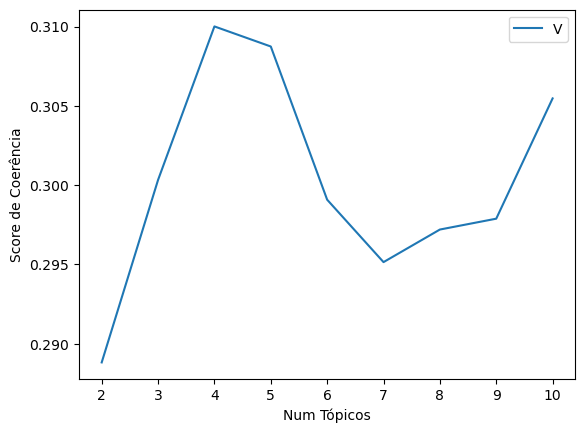

In [22]:
x = range_lda
plt.plot(x, coherence_values)
plt.xlabel("Num Tópicos")
plt.ylabel("Score de Coerência")
plt.legend(("Valores de Coerência"), loc='best')
plt.show()

In [23]:
for m, cv in zip(x, coherence_values):
    print("A quantidade de tópicos =", m, " tem um valor de coerência de ", round(cv, 4))

A quantidade de tópicos = 2  tem um valor de coerência de  0.2888
A quantidade de tópicos = 3  tem um valor de coerência de  0.3003
A quantidade de tópicos = 4  tem um valor de coerência de  0.31
A quantidade de tópicos = 5  tem um valor de coerência de  0.3087
A quantidade de tópicos = 6  tem um valor de coerência de  0.2991
A quantidade de tópicos = 7  tem um valor de coerência de  0.2951
A quantidade de tópicos = 8  tem um valor de coerência de  0.2972
A quantidade de tópicos = 9  tem um valor de coerência de  0.2979
A quantidade de tópicos = 10  tem um valor de coerência de  0.3055


# Save best model

In [24]:
optimal_model_index = coherence_values.index(max(coherence_values))
optimal_model = model_list[optimal_model_index]
optimal_num_topics = optimal_model.num_topics

print(f"Melhor número de tópicos: {optimal_num_topics}")

with open('pickle/optimal_model.p', 'wb') as file:
    pickle.dump(optimal_model, file)

Melhor número de tópicos: 4
